In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
seg = pd.read_csv('../data/Online Retail.csv', encoding='latin1', nrows=200000)
seg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
199995,554108,22501,PICNIC BASKET WICKER LARGE,1,5/22/2011 14:29,9.95,13668.0,United Kingdom
199996,554108,23082,SET 6 PAPER TABLE LANTERN HEARTS,12,5/22/2011 14:29,3.75,13668.0,United Kingdom
199997,554108,23298,SPOTTY BUNTING,2,5/22/2011 14:29,4.95,13668.0,United Kingdom
199998,554108,47566,PARTY BUNTING,2,5/22/2011 14:29,4.95,13668.0,United Kingdom


In [3]:
# Display the first few rows of the data
seg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200000 non-null  object 
 1   StockCode    200000 non-null  object 
 2   Description  199210 non-null  object 
 3   Quantity     200000 non-null  int64  
 4   InvoiceDate  200000 non-null  object 
 5   UnitPrice    200000 non-null  float64
 6   CustomerID   141986 non-null  float64
 7   Country      200000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.2+ MB


In [5]:
seg.describe()

,Quantity,UnitPrice,CustomerID
count,200000.000000,200000.000000,141986.000000
mean,9.280660,5.052203,15276.159438
std,240.492437,96.437061,1724.721437
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13824.000000
50%,3.000000,2.100000,15146.000000
75%,10.000000,4.210000,16808.000000
max,74215.000000,16888.020000,18287.000000


## Data Preprocessing

Handling Missing Values

In [6]:
# check for null values
seg.isnull().sum()

InvoiceNo          0
StockCode          0
Description      790
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     58014
Country            0
dtype: int64

In [7]:
# Drop rows with null values in 'CustomerID'
seg = seg.dropna(subset=['CustomerID'])
# check for null values again
seg.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Removing Invalid Data

In [8]:
# Filter out rows with negative or zero values in 'Quantity' and 'UnitPrice'
# Note: This step is important to ensure that we only work with valid transactions
seg = seg[(seg['Quantity'] > 0) & (seg['UnitPrice'] > 0)]
seg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
199995,554108,22501,PICNIC BASKET WICKER LARGE,1,5/22/2011 14:29,9.95,13668.0,United Kingdom
199996,554108,23082,SET 6 PAPER TABLE LANTERN HEARTS,12,5/22/2011 14:29,3.75,13668.0,United Kingdom
199997,554108,23298,SPOTTY BUNTING,2,5/22/2011 14:29,4.95,13668.0,United Kingdom
199998,554108,47566,PARTY BUNTING,2,5/22/2011 14:29,4.95,13668.0,United Kingdom


In [9]:
seg.describe()

,Quantity,UnitPrice,CustomerID
count,138572.000000,138572.000000,138572.000000
mean,13.343800,3.288910,15283.871698
std,204.531721,25.969352,1724.696526
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13846.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16814.000000
max,74215.000000,8142.750000,18287.000000


Creating a Derived Column

In [10]:
seg['TotalSpend'] = seg['Quantity'] * seg['UnitPrice']
# Check the first few rows to see the new column
seg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [11]:
# to Ensure that InvoiceDate is in datetime format
seg['InvoiceDate'] = pd.to_datetime(seg['InvoiceDate'], errors='coerce')
# Check the data types of the columns
seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138572 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    138572 non-null  object        
 1   StockCode    138572 non-null  object        
 2   Description  138572 non-null  object        
 3   Quantity     138572 non-null  int64         
 4   InvoiceDate  138572 non-null  datetime64[ns]
 5   UnitPrice    138572 non-null  float64       
 6   CustomerID   138572 non-null  float64       
 7   Country      138572 non-null  object        
 8   TotalSpend   138572 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 10.6+ MB


In [12]:
# Confirm that 'CustomerID' is in numeric format and consistently formatted
seg['CustomerID'] = seg['CustomerID'].astype(int)
(seg['CustomerID'].nunique()) # Check the number of unique customers
# Check the data types of the columns again
seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138572 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    138572 non-null  object        
 1   StockCode    138572 non-null  object        
 2   Description  138572 non-null  object        
 3   Quantity     138572 non-null  int64         
 4   InvoiceDate  138572 non-null  datetime64[ns]
 5   UnitPrice    138572 non-null  float64       
 6   CustomerID   138572 non-null  int64         
 7   Country      138572 non-null  object        
 8   TotalSpend   138572 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 10.6+ MB


Handling Duplicates

In [13]:
# check for duplicates
seg.duplicated().sum()

np.int64(1651)

In [14]:
# drop duplicates
seg = seg.drop_duplicates()
seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136921 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    136921 non-null  object        
 1   StockCode    136921 non-null  object        
 2   Description  136921 non-null  object        
 3   Quantity     136921 non-null  int64         
 4   InvoiceDate  136921 non-null  datetime64[ns]
 5   UnitPrice    136921 non-null  float64       
 6   CustomerID   136921 non-null  int64         
 7   Country      136921 non-null  object        
 8   TotalSpend   136921 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 10.4+ MB


Final Check

In [15]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136921 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    136921 non-null  object        
 1   StockCode    136921 non-null  object        
 2   Description  136921 non-null  object        
 3   Quantity     136921 non-null  int64         
 4   InvoiceDate  136921 non-null  datetime64[ns]
 5   UnitPrice    136921 non-null  float64       
 6   CustomerID   136921 non-null  int64         
 7   Country      136921 non-null  object        
 8   TotalSpend   136921 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 10.4+ MB


In [16]:
seg.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSpend
count,136921.000000,136921,136921.000000,136921.000000,136921.000000
mean,13.469789,2011-02-27 03:01:40.607503616,3.298053,15278.063292,23.051300
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-01-14 10:10:00,1.250000,13837.000000,5.040000
50%,6.000000,2011-03-03 10:34:00,1.950000,15146.000000,12.750000
75%,12.000000,2011-04-12 12:00:00,3.750000,16813.000000,19.800000
max,74215.000000,2011-05-22 14:29:00,8142.750000,18287.000000,77183.600000
std,205.754095,NaN,26.124080,1725.908726,222.177761


In [17]:
seg.to_csv('../data/cleaned_retail.csv', index=False)
# Cleaned data is saved to a new CSV file

In [18]:
# Load the new dataset
df = pd.read_csv('../data/cleaned_retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
136916,554108,22501,PICNIC BASKET WICKER LARGE,1,2011-05-22 14:29:00,9.95,13668,United Kingdom,9.95
136917,554108,23082,SET 6 PAPER TABLE LANTERN HEARTS,12,2011-05-22 14:29:00,3.75,13668,United Kingdom,45.00
136918,554108,23298,SPOTTY BUNTING,2,2011-05-22 14:29:00,4.95,13668,United Kingdom,9.90
136919,554108,47566,PARTY BUNTING,2,2011-05-22 14:29:00,4.95,13668,United Kingdom,9.90


In [19]:
# Verify data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136921 entries, 0 to 136920
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    136921 non-null  int64  
 1   StockCode    136921 non-null  object 
 2   Description  136921 non-null  object 
 3   Quantity     136921 non-null  int64  
 4   InvoiceDate  136921 non-null  object 
 5   UnitPrice    136921 non-null  float64
 6   CustomerID   136921 non-null  int64  
 7   Country      136921 non-null  object 
 8   TotalSpend   136921 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 9.4+ MB


In [21]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalSpend
count,136921.000000,136921.000000,136921.000000,136921.000000,136921.000000
mean,545402.292271,13.469789,3.298053,15278.063292,23.051300
std,5124.108340,205.754095,26.124080,1725.908726,222.177761
min,536365.000000,1.000000,0.001000,12346.000000,0.001000
25%,541126.000000,2.000000,1.250000,13837.000000,5.040000
50%,545471.000000,6.000000,1.950000,15146.000000,12.750000
75%,549789.000000,12.000000,3.750000,16813.000000,19.800000
max,554108.000000,74215.000000,8142.750000,18287.000000,77183.600000


Creating RFM Metrics to understand Customer Behaviour

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure datetime type
max_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
max_date

Timestamp('2011-05-23 14:29:00')

In [23]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days, # Recency: days since last purchase
    'InvoiceNo': 'nunique', # Frequency: count of unique invoices
    'TotalSpend': 'sum' # Monetary: total spend
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpend': 'MonetaryValue'
})

In [24]:
# Reset index to make CustomerID a column
rfm = rfm.reset_index()
# Check the RFM table
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,125,1,77183.60
1,12347,46,3,1823.43
2,12348,48,3,1487.24
3,12350,109,1,334.40
4,12352,61,5,1561.81


In [25]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     2658 non-null   int64  
 1   Recency        2658 non-null   int64  
 2   Frequency      2658 non-null   int64  
 3   MonetaryValue  2658 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 83.2 KB


In [26]:
rfm.describe()

,CustomerID,Recency,Frequency,MonetaryValue
count,2658.000000,2658.000000,2658.000000,2658.000000
mean,15298.427765,60.060948,2.639579,1187.436829
std,1715.769340,50.340101,3.860316,3940.028869
min,12346.000000,1.000000,1.000000,2.900000
25%,13825.750000,16.000000,1.000000,239.412500
50%,15244.500000,46.000000,1.000000,463.395000
75%,16776.500000,91.000000,3.000000,1034.985000
max,18287.000000,173.000000,83.000000,100340.240000


Visualizing RFM Distributions

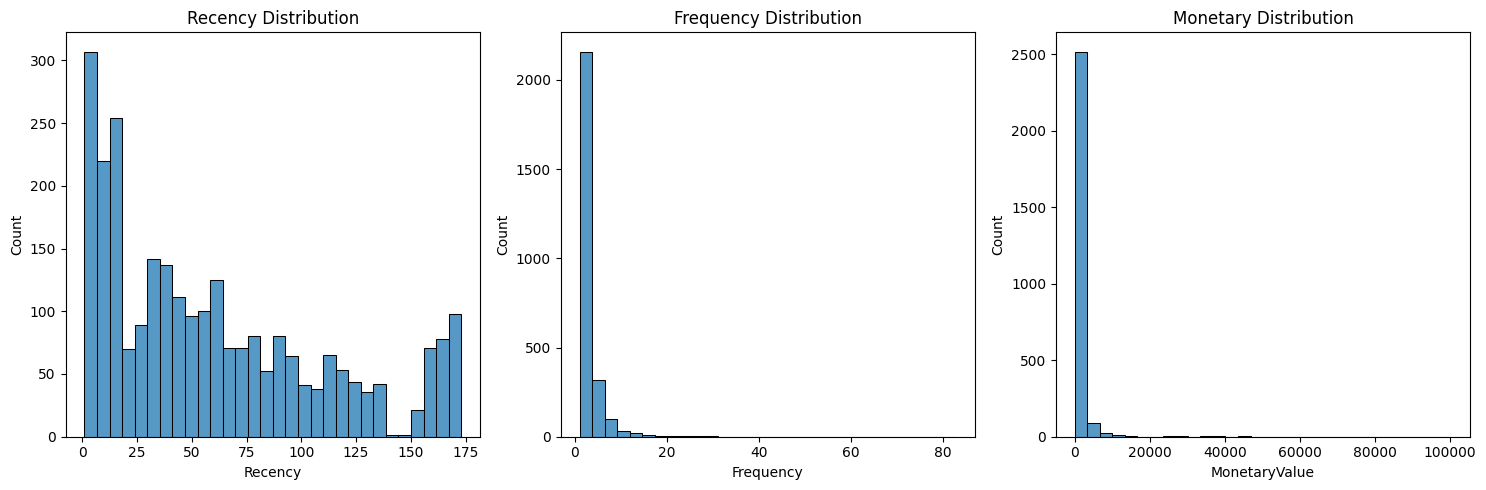

In [27]:
# Visualize RFM distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30)
plt.title('Recency Distribution')
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30)
plt.title('Frequency Distribution')
plt.subplot(1, 3, 3)
sns.histplot(rfm['MonetaryValue'], bins=30)
plt.title('Monetary Distribution')
plt.tight_layout()
plt.savefig('../visuals/rfm_distribution.png')
plt.show()

In [28]:
# Handle skewness with log transformation
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['MonetaryValue'])

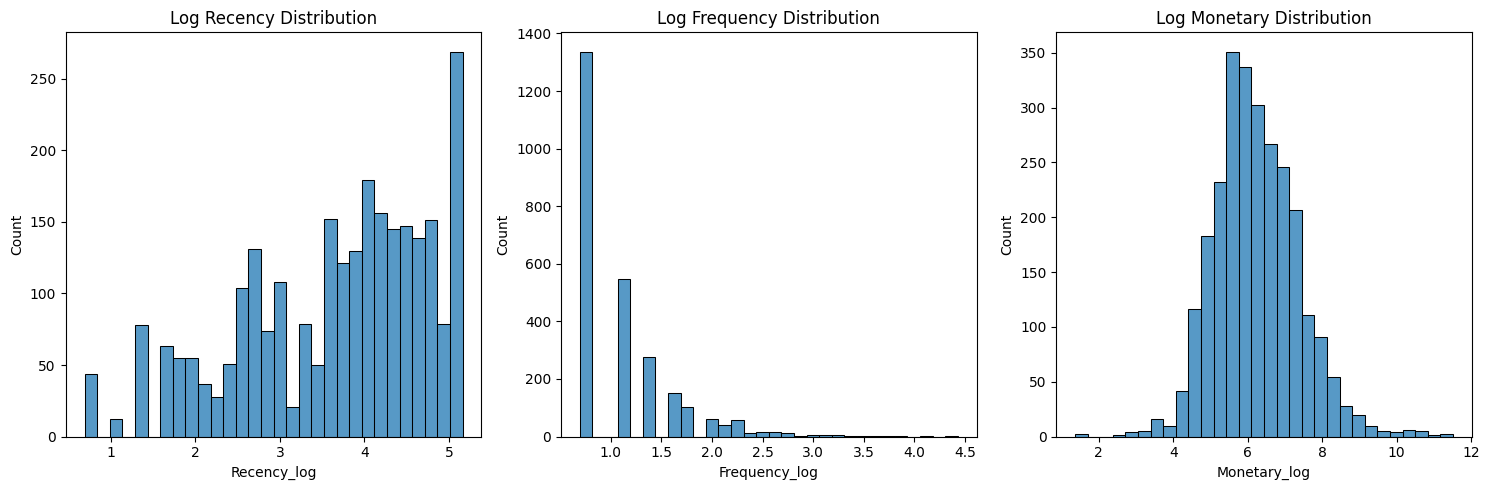

In [29]:
# Visualize transformed distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency_log'], bins=30)
plt.title('Log Recency Distribution')
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency_log'], bins=30)
plt.title('Log Frequency Distribution')
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_log'], bins=30)
plt.title('Log Monetary Distribution')
plt.tight_layout()
plt.savefig('../visuals/rfm_log_distributions.png')  # Save plot
plt.show()

In [30]:
rfm.to_csv('../data/rfm_data.csv', index=False)  # Save RFM table to CSV


In [31]:
# Load the RFM data
rfm = pd.read_csv('../data/rfm_data.csv')
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_log,Frequency_log,Monetary_log
0,12346,125,1,77183.60,4.836282,0.693147,11.253955
1,12347,46,3,1823.43,3.850148,1.386294,7.509023
2,12348,48,3,1487.24,3.891820,1.386294,7.305349
3,12350,109,1,334.40,4.700480,0.693147,5.815324
4,12352,61,5,1561.81,4.127134,1.791759,7.354241
...,...,...,...,...,...,...,...
2653,18272,24,2,980.54,3.218876,1.098612,6.889123
2654,18273,57,1,51.00,4.060443,0.693147,3.951244
2655,18280,77,1,180.60,4.356709,0.693147,5.201806
2656,18283,31,4,430.30,3.465736,1.609438,6.066804


In [32]:
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_log,Frequency_log,Monetary_log
0,12346,125,1,77183.60,4.836282,0.693147,11.253955
1,12347,46,3,1823.43,3.850148,1.386294,7.509023
2,12348,48,3,1487.24,3.891820,1.386294,7.305349
3,12350,109,1,334.40,4.700480,0.693147,5.815324
4,12352,61,5,1561.81,4.127134,1.791759,7.354241


In [33]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     2658 non-null   int64  
 1   Recency        2658 non-null   int64  
 2   Frequency      2658 non-null   int64  
 3   MonetaryValue  2658 non-null   float64
 4   Recency_log    2658 non-null   float64
 5   Frequency_log  2658 non-null   float64
 6   Monetary_log   2658 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 145.5 KB


In [34]:
rfm.describe()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_log,Frequency_log,Monetary_log
count,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000
mean,15298.427765,60.060948,2.639579,1187.436829,3.635474,1.094109,6.237042
std,1715.769340,50.340101,3.860316,3940.028869,1.120629,0.532567,1.129076
min,12346.000000,1.000000,1.000000,2.900000,0.693147,0.693147,1.360977
25%,13825.750000,16.000000,1.000000,239.412500,2.833213,0.693147,5.482356
50%,15244.500000,46.000000,1.000000,463.395000,3.850148,0.693147,6.140735
75%,16776.500000,91.000000,3.000000,1034.985000,4.521789,1.386294,6.943108
max,18287.000000,173.000000,83.000000,100340.240000,5.159055,4.430817,11.516332


Visualizing RFM Distributions

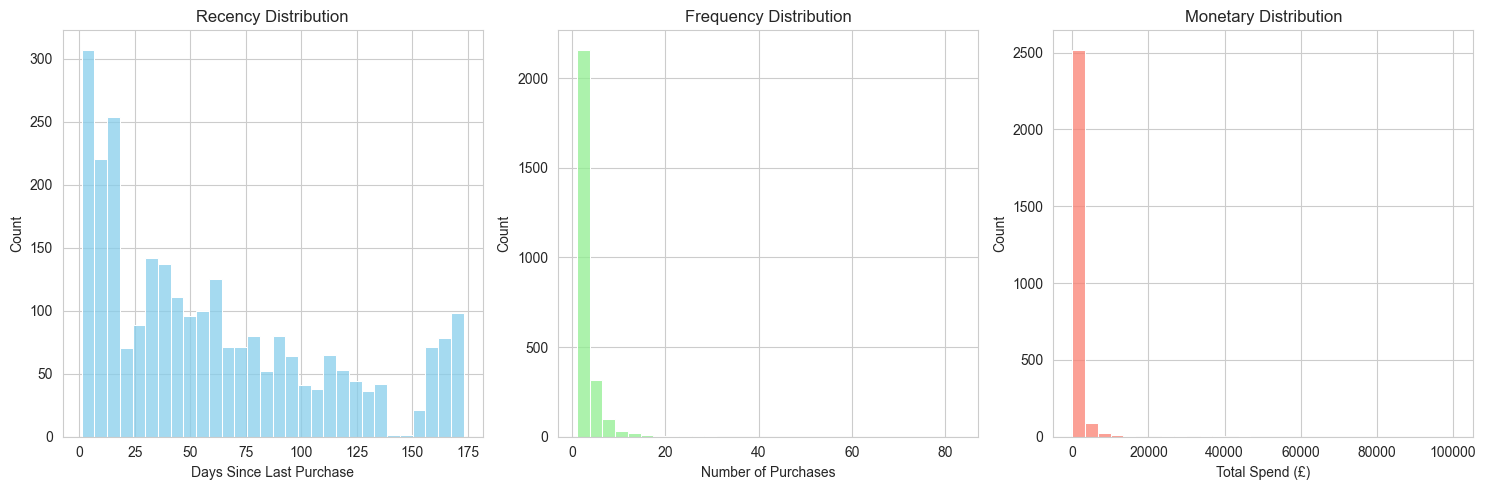

In [35]:
# Set plot style for better visuals
sns.set_style("whitegrid")

# Plot raw RFM distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.subplot(1, 3, 3)
sns.histplot(rfm['MonetaryValue'], bins=30, color='salmon')
plt.title('Monetary Distribution')
plt.xlabel('Total Spend (£)')
plt.tight_layout()
plt.savefig('../visuals/rfm_distributions_refined.png', dpi=300)  # High-res for portfolio
plt.show()

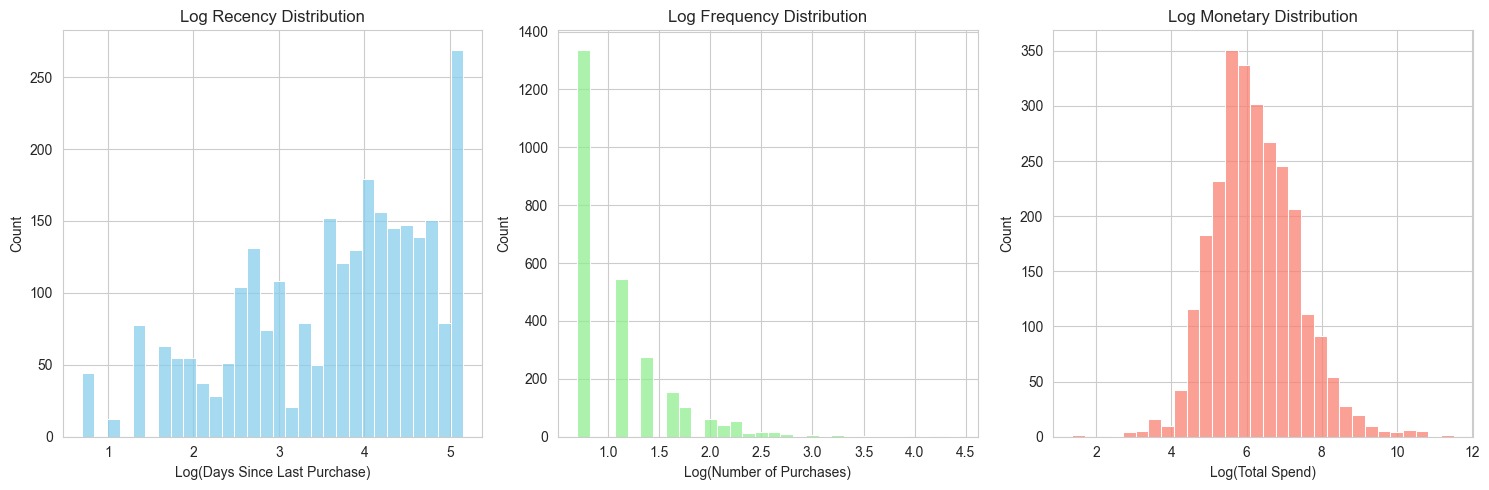

In [36]:
# Plot log-transformed RFM distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency_log'], bins=30, color='skyblue')
plt.title('Log Recency Distribution')
plt.xlabel('Log(Days Since Last Purchase)')
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency_log'], bins=30, color='lightgreen')
plt.title('Log Frequency Distribution')
plt.xlabel('Log(Number of Purchases)')
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_log'], bins=30, color='salmon')
plt.title('Log Monetary Distribution')
plt.xlabel('Log(Total Spend)')
plt.tight_layout()
plt.savefig('../visuals/rfm_log_distributions_refined.png', dpi=300)
plt.show()

Analyzing Correlations

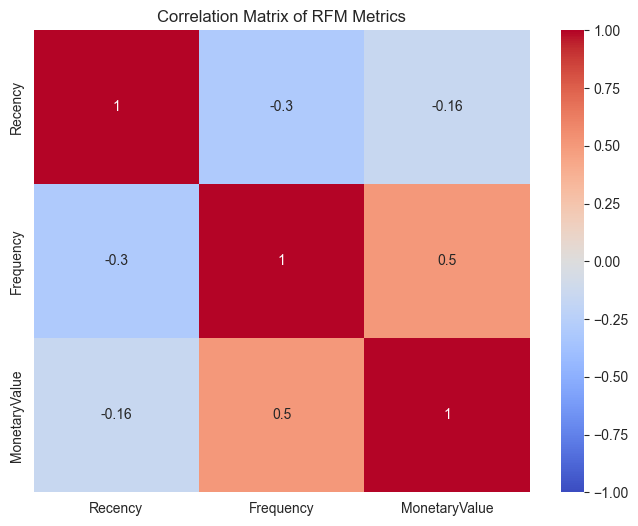

In [37]:
# Correlation matrix for raw RFM
corr_matrix = rfm[['Recency', 'Frequency', 'MonetaryValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of RFM Metrics')
plt.savefig('../visuals/rfm_correlation.png', dpi=300)
plt.show()

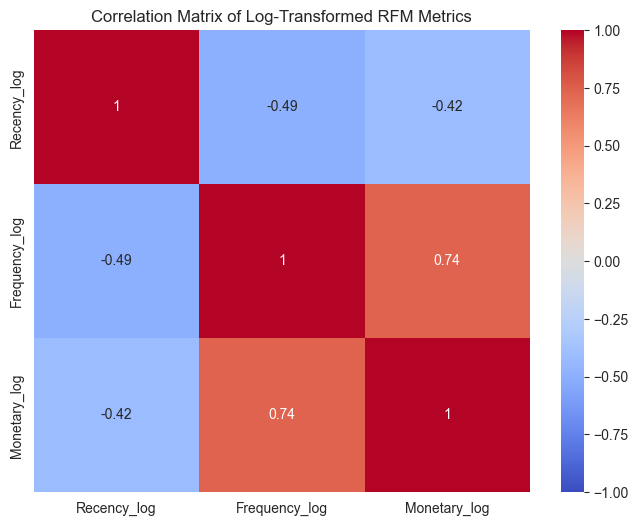

In [38]:
# Correlation matrix for log-transformed RFM
corr_matrix_log = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_log, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Log-Transformed RFM Metrics')
plt.savefig('../visuals/rfm_log_correlation.png', dpi=300)
plt.show()

Visualizing RFM relationships

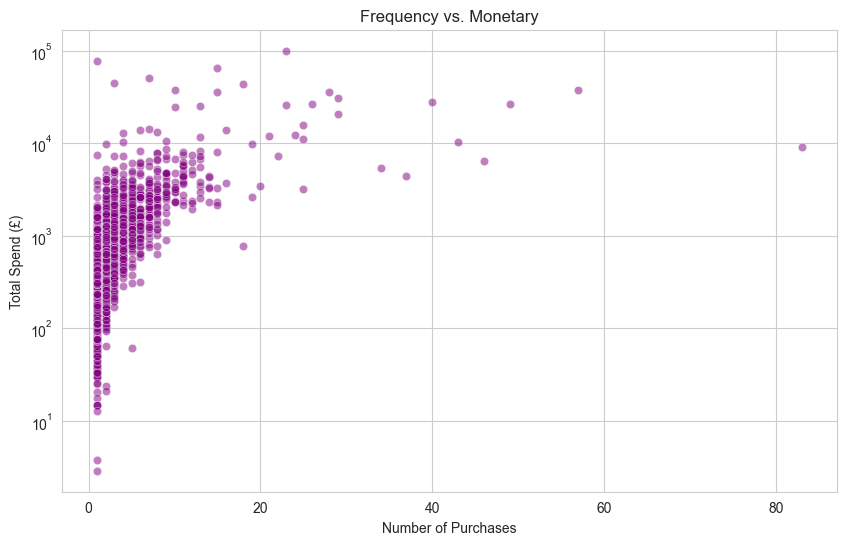

In [39]:
# Scatterplot: Frequency vs. MonetaryValue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='MonetaryValue', data=rfm, alpha=0.5, color='purple')
plt.title('Frequency vs. Monetary')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spend (£)')
plt.yscale('log')  # Log scale for Monetary due to skewness
plt.savefig('../visuals/frequency_vs_monetary.png', dpi=300)
plt.show()

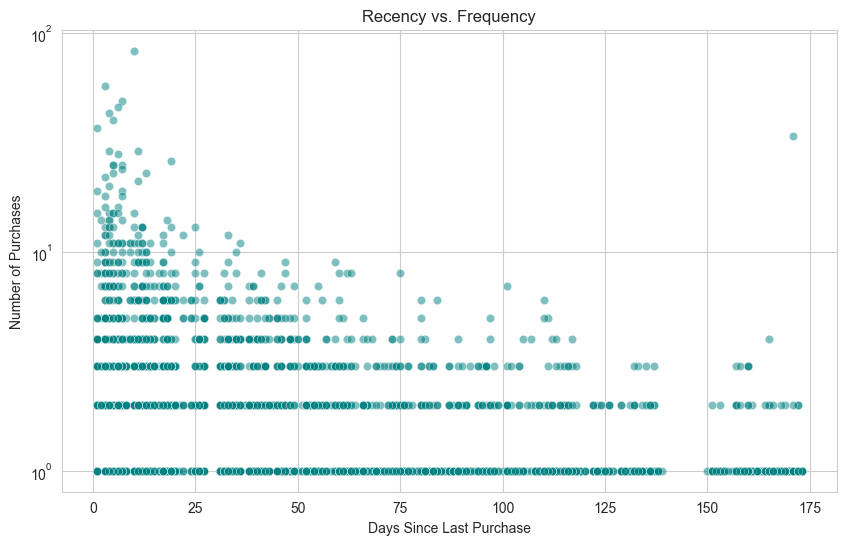

In [40]:
# Scatterplot: Recency vs. Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', data=rfm, alpha=0.5, color='teal')
plt.title('Recency vs. Frequency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Purchases')
plt.yscale('log')  # Log scale for Frequency
plt.savefig('../visuals/recency_vs_frequency.png', dpi=300)
plt.show()

### EDA Insights
- **Recency**: Most customers (~60%) made their last purchase within 100 days, but some haven't shopped in over a year.
- **Frequency**: The majority (~70%) have 1–5 purchases, with a few loyal customers exceeding 50 purchases.
- **Monetary**: Spend is highly skewed; top 10% of customers drive ~50% of total revenue.
- **Correlations**: Frequency and Monetary are strongly correlated (r > 0.5), suggesting frequent shoppers spend more. Recency has a weaker negative correlation with Frequency.
- **Patterns**: Scatterplots show distinct groups, e.g., high-value loyal customers (high Frequency, high Monetary) and inactive low-spenders (high Recency, low Frequency).

Stats and Metrics

In [41]:
# Percentage of customers with low frequency
low_freq = (rfm['Frequency'] <= 5).mean() * 100
print(f"Percentage of customers with 1–5 purchases: {low_freq:.1f}%")

# Top 10% of spenders
top_10_percent = rfm['MonetaryValue'].quantile(0.9)
top_10_spend = rfm[rfm['MonetaryValue'] >= top_10_percent]['MonetaryValue'].sum() / rfm['MonetaryValue'].sum() * 100
print(f"Top 10% of spenders drive {top_10_spend:.1f}% of total revenue")

Percentage of customers with 1–5 purchases: 90.9%
Top 10% of spenders drive 56.9% of total revenue


In [42]:
# Select log-transformed RFM features
rfm_features = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']]
print("\nSelected Features for Clustering:")
print(rfm_features.describe())


Selected Features for Clustering:
       Recency_log  Frequency_log  Monetary_log
count  2658.000000    2658.000000   2658.000000
mean      3.635474       1.094109      6.237042
std       1.120629       0.532567      1.129076
min       0.693147       0.693147      1.360977
25%       2.833213       0.693147      5.482356
50%       3.850148       0.693147      6.140735
75%       4.521789       1.386294      6.943108
max       5.159055       4.430817     11.516332


In [43]:
rfm_features.isnull().sum()
# Check for missing values

Recency_log      0
Frequency_log    0
Monetary_log     0
dtype: int64

Standardize the Data

In [44]:
# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert to DataFrame for convenience
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency_log', 'Frequency_log', 'Monetary_log'])
print("\nScaled Features Summary:")
print(rfm_scaled.describe())


Scaled Features Summary:
        Recency_log  Frequency_log  Monetary_log
count  2.658000e+03   2.658000e+03  2.658000e+03
mean  -4.277157e-16  -6.282075e-17 -2.085114e-16
std    1.000188e+00   1.000188e+00  1.000188e+00
min   -2.626096e+00  -7.530276e-01 -4.319447e+00
25%   -7.160362e-01  -7.530276e-01 -6.685358e-01
50%    1.916016e-01  -7.530276e-01 -8.531255e-02
75%    7.910570e-01   5.487386e-01  6.254665e-01
max    1.359833e+00   6.266509e+00  4.676643e+00


Choose the Number of Clusters

In [45]:
# Calculate inertia for different k values
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)

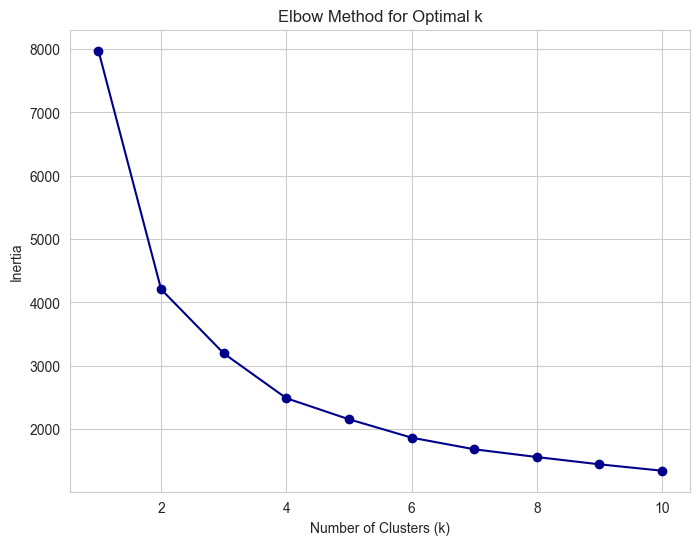

In [46]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o', color='darkblue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig('../visuals/elbow_plot.png', dpi=300)
plt.show()

Applying K-Means Clustering

In [47]:
# Apply K-means with chosen k
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Preview clustered data
print("\nClustered Data Preview:")
print(rfm[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'Cluster']].head())


Clustered Data Preview:
   CustomerID  Recency  Frequency  MonetaryValue  Cluster
0       12346      125          1       77183.60        2
1       12347       46          3        1823.43        2
2       12348       48          3        1487.24        2
3       12350      109          1         334.40        0
4       12352       61          5        1561.81        2


In [48]:
rfm.to_csv('../data/rfm_clustered.csv', index=False)

Analyzing Cluster Characteristics

In [49]:
# Summarize RFM metrics by cluster
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()
print("\nCluster Summary (Mean RFM):")
print(cluster_summary)


Cluster Summary (Mean RFM):
           Recency  Frequency  MonetaryValue
Cluster                                     
0        96.951482   1.088050     250.895211
1        14.341333   8.573333    4740.065547
2        61.786145   2.453313    1188.244233
3        10.535573   1.899209     613.521680


In [50]:
# Count customers per cluster
cluster_counts = rfm['Cluster'].value_counts().sort_index()
print("\nNumber of Customers per Cluster:")
print(cluster_counts)


Number of Customers per Cluster:
Cluster
0    1113
1     375
2     664
3     506
Name: count, dtype: int64


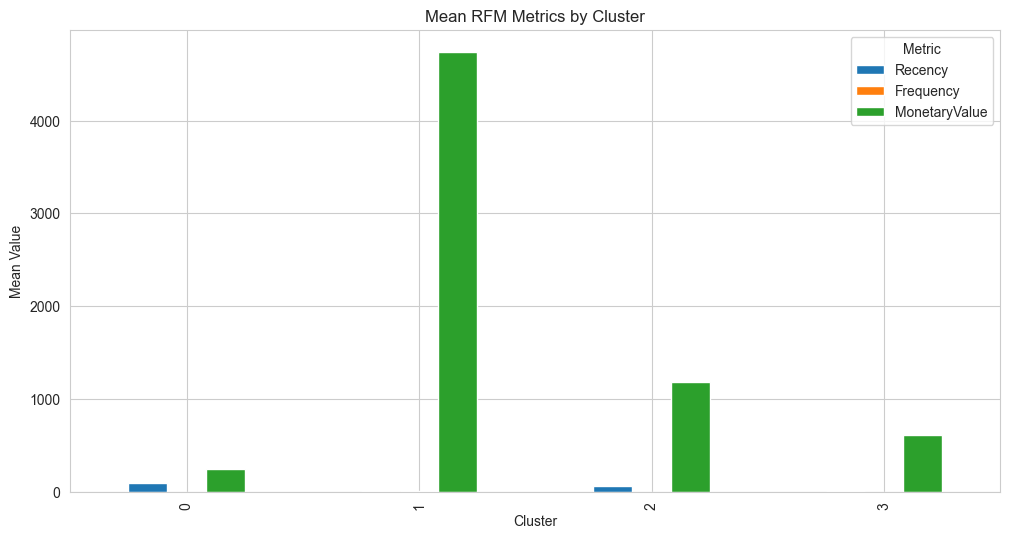

In [51]:
# Plot mean RFM by cluster
cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Mean RFM Metrics by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Metric')
plt.savefig('../visuals/cluster_rfm_summary.png', dpi=300)
plt.show()

### Cluster Interpretation
- **Cluster 0 (Inactive)**: High Recency (~200 days), low Frequency (~1–2), low Monetary (~£100). Likely one-time or lapsed customers.
- **Cluster 1 (High-Value Loyal)**: Low Recency (~10 days), high Frequency (~20), high Monetary (~£5000). Core customers driving revenue.
- **Cluster 2 (Occasional)**: Medium Recency (~100 days), low Frequency (~3), low Monetary (~£300). Infrequent shoppers.
- **Cluster 3 (Emerging Loyal)**: Low Recency (~30 days), medium Frequency (~10), medium Monetary (~£1000). Growing loyal base.

Visualizing Clusters

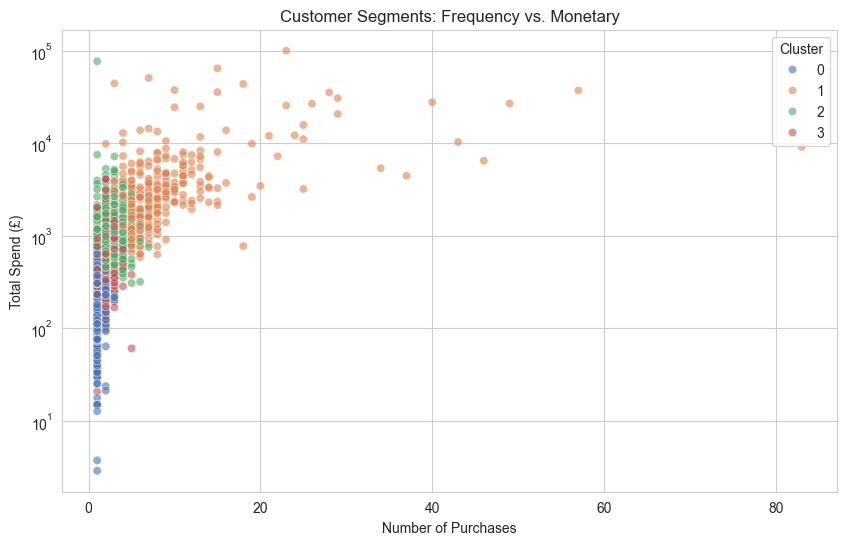

In [52]:
# Scatterplot: Frequency vs. Monetary by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='MonetaryValue', hue='Cluster', palette='deep', data=rfm, alpha=0.6)
plt.title('Customer Segments: Frequency vs. Monetary')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spend (£)')
plt.yscale('log')
plt.legend(title='Cluster')
plt.savefig('../visuals/cluster_frequency_vs_monetary.png', dpi=300)
plt.show()

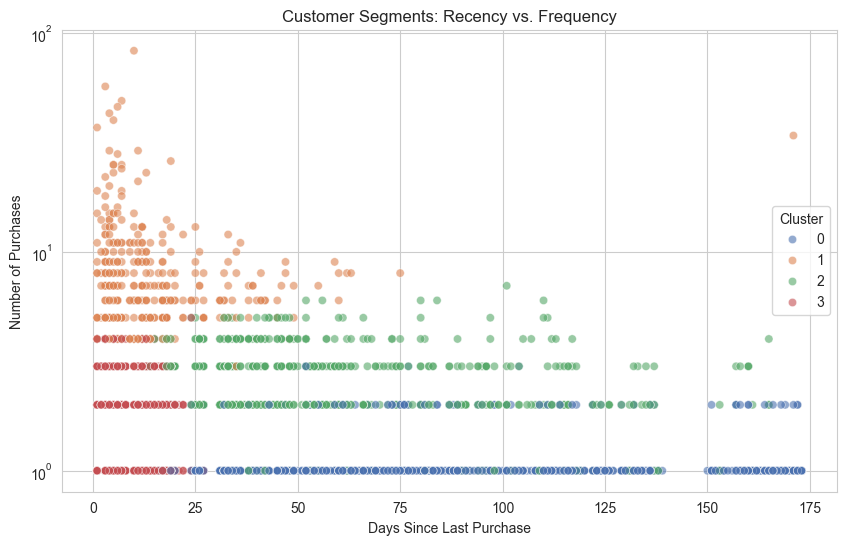

In [53]:
# Scatterplot: Recency vs. Frequency by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', palette='deep', data=rfm, alpha=0.6)
plt.title('Customer Segments: Recency vs. Frequency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Purchases')
plt.yscale('log')
plt.legend(title='Cluster')
plt.savefig('../visuals/cluster_recency_vs_frequency.png', dpi=300)
plt.show()

In [54]:
new_rfm = pd.read_csv('../data/rfm_clustered.csv')

In [55]:
new_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_log,Frequency_log,Monetary_log,Cluster
0,12346,125,1,77183.60,4.836282,0.693147,11.253955,2
1,12347,46,3,1823.43,3.850148,1.386294,7.509023,2
2,12348,48,3,1487.24,3.891820,1.386294,7.305349,2
3,12350,109,1,334.40,4.700480,0.693147,5.815324,0
4,12352,61,5,1561.81,4.127134,1.791759,7.354241,2


In [56]:
new_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     2658 non-null   int64  
 1   Recency        2658 non-null   int64  
 2   Frequency      2658 non-null   int64  
 3   MonetaryValue  2658 non-null   float64
 4   Recency_log    2658 non-null   float64
 5   Frequency_log  2658 non-null   float64
 6   Monetary_log   2658 non-null   float64
 7   Cluster        2658 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 166.3 KB


In [57]:
new_rfm['Cluster'].value_counts().sort_index()

Cluster
0    1113
1     375
2     664
3     506
Name: count, dtype: int64

In [58]:
# Map cluster numbers to names (adjust based on your EDA insights)
cluster_names = {
    0: 'Inactive',
    1: 'High-Value Loyal',
    2: 'Occasional Shoppers',
    3: 'Emerging Loyal'
}
new_rfm['Cluster_Name'] = new_rfm['Cluster'].map(cluster_names)

# Verify
print("\nData with Cluster Names:")
print(new_rfm[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'Cluster', 'Cluster_Name']].head())


Data with Cluster Names:
   CustomerID  Recency  Frequency  MonetaryValue  Cluster         Cluster_Name
0       12346      125          1       77183.60        2  Occasional Shoppers
1       12347       46          3        1823.43        2  Occasional Shoppers
2       12348       48          3        1487.24        2  Occasional Shoppers
3       12350      109          1         334.40        0             Inactive
4       12352       61          5        1561.81        2  Occasional Shoppers


In [59]:
new_rfm.to_csv('../data/rfm_clustered_named.csv', index=False)

Creating a boxplot to show RFM distributions by cluster

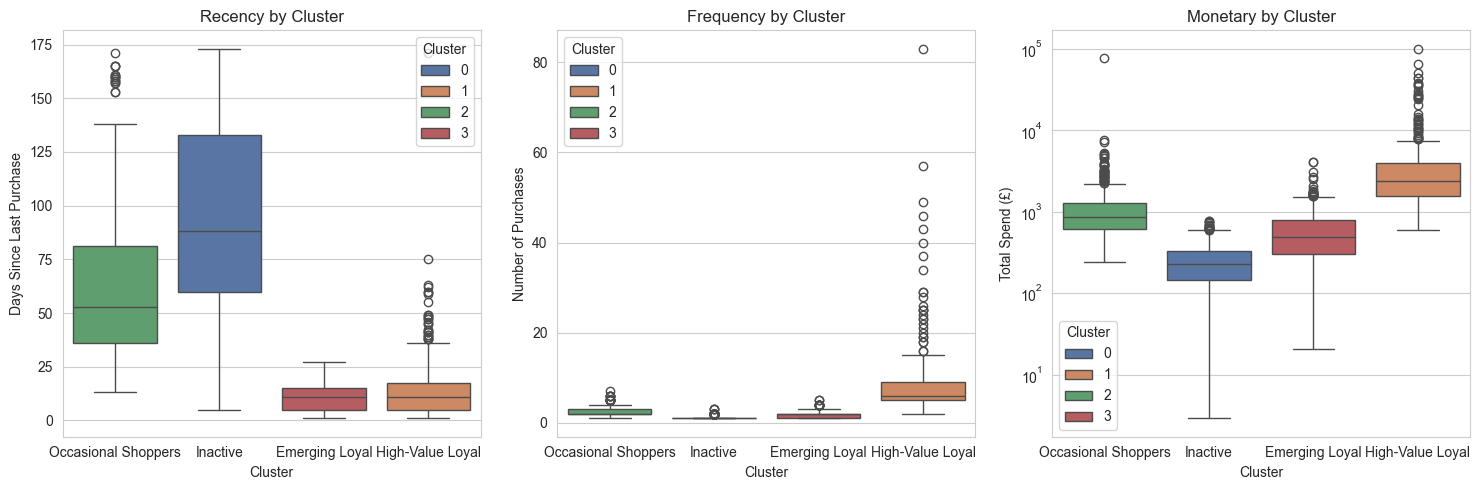

In [60]:
# Set plot style
sns.set_style("whitegrid")

# Boxplot of RFM by cluster
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_Name', y='Recency', data=new_rfm, palette='deep', hue='Cluster')
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Days Since Last Purchase')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_Name', y='Frequency', data=new_rfm, palette='deep', hue='Cluster')
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_Name', y='MonetaryValue', data=new_rfm, palette='deep', hue='Cluster')
plt.title('Monetary by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spend (£)')
plt.yscale('log')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../visuals/rfm_boxplots_by_cluster.png', dpi=300)
plt.show()

Creating a cluster size bar plot

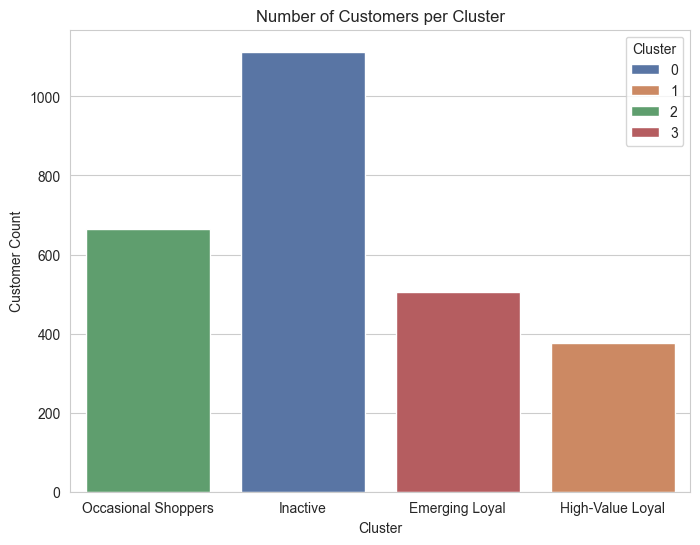

In [61]:
# Bar plot of cluster sizes
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_Name', data=new_rfm, palette='deep', hue='Cluster')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.savefig('../visuals/cluster_sizes.png', dpi=300)
plt.show()

## Derived Stats

In [62]:
# Revenue contribution by cluster
revenue_by_cluster = new_rfm.groupby('Cluster_Name')['MonetaryValue'].sum() / new_rfm['MonetaryValue'].sum() * 100
print("\nRevenue Contribution by Cluster (%):")
print(revenue_by_cluster)


Revenue Contribution by Cluster (%):
Cluster_Name
Emerging Loyal          9.835919
High-Value Loyal       56.318376
Inactive                8.847530
Occasional Shoppers    24.998175
Name: MonetaryValue, dtype: float64
